## Lecture 3B - Spatial Frequency, Downsampling, Upsampling

#### Announcements

* Adding a little structure for in-class exercises - I'm going to have you work in assigned pairs.
   * Randomly assigned - switch it up each week, perhaps?
 | | |
 | ------ | ------- |
 | Ned    | Jacob   |
 | Charles| Shingo  |
 | Grayson| Camiel  |
 | Finn   | Layla   |

#### Goals
* Know the meaning and construction of "low pass" and "high pass" filters
* Know how to make images smaller:
  * The naive way via subsampling (and why this is bad)
  * The principled way by downsampling with prefiltering (and why this is better)
* Know how to make images bigger

In [63]:
# boilerplate setup
%load_ext autoreload
%autoreload 2

%matplotlib inline

import os
import sys

src_path = os.path.abspath("../src")
if (src_path not in sys.path):
    sys.path.insert(0, src_path)

# Library imports
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import skimage as skim
import cv2

# codebase imports
import util
import filtering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reminder: The Frequencyometer

The cliff-hanger from last class: how does blurring affect the frequencyometer for an image?

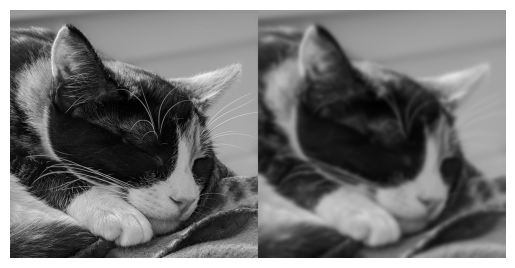

In [64]:
beans = imageio.imread("../data/beans.jpg").astype(np.float32) / 255.0
bg = skim.color.rgb2gray(beans) # grayscale beans
blurry_beans = cv2.GaussianBlur(bg, ksize=(25, 25), sigmaX=4)

util.imshow_gray(np.hstack([bg, blurry_beans]))
plt.gcf().gca().set_axis_off()

#### Definitions: "Low-Pass" and "High-Pass" filters

Low-pass: allows low frequencies to pass through unaffected, i.e., attenuates high frequencies.
* In other words: blur!

High-pass: allows high frequencies to pass through unaffected, i.e., attenuates low frequencies.
* In other words: derivative, (with slight but common terminology abuse) sobel, or  sharpening

**Question that didn't make it onto the homework:** in what sense is Sobel not truly a high-pass filter?

##### Homework Problems 3-6

(3) Using the language of "low-" and "high-frequency" image content, explain why sharpening is not the inverse of blurring, and what it accomplishes instead.

(4) Consider the original image of beans on the left, and the processed version on the right. Describe what has changed in terms of frequency content.

   ![](../data/beans_frequency.jpg)
   
(5) What's the **maximum** frequency (expressed in full periods per pixel) representable in a 1D image (i.e., a row of pixels)? What does such an image look like?

(6) What's the **minimum** frequency representable in a 1D image? What does such an image look like?

### Downsampling

My image is too big to fit on my screen. For example, suppose beans is 600x600, but I want to display the image in 300x300 pixels. What should I do?

In [65]:
bg.shape # beans grayscale

(600, 600)

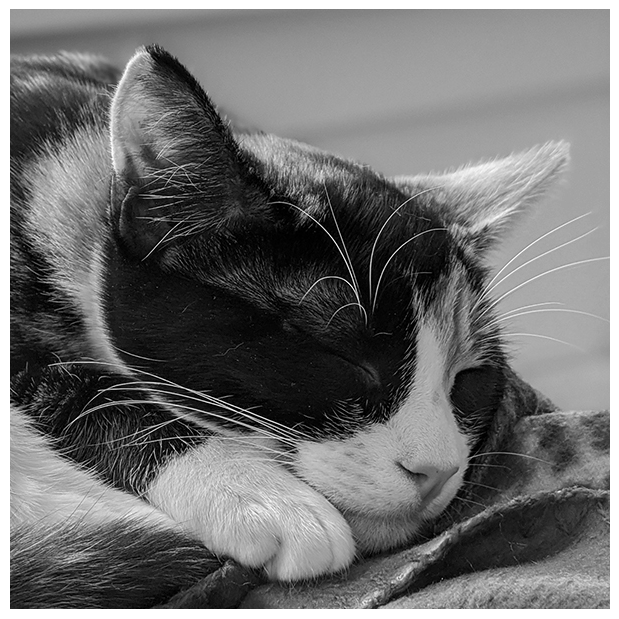

In [66]:
util.imshow_truesize(bg)

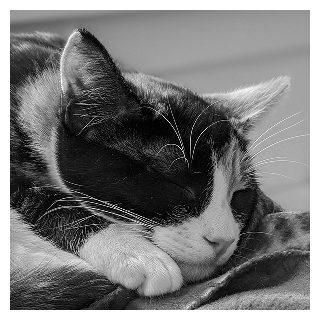

In [67]:
util.imshow_truesize(bg[::2,::2])

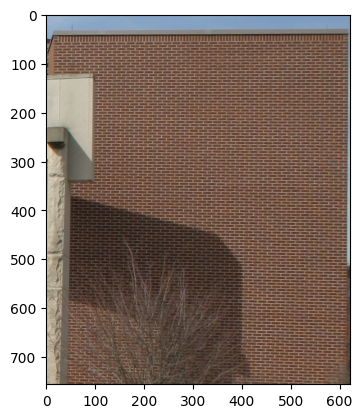

In [68]:
bricks = imageio.imread("../data/bricks.jpg").astype(np.float32) / 255.0
plt.imshow(bricks)

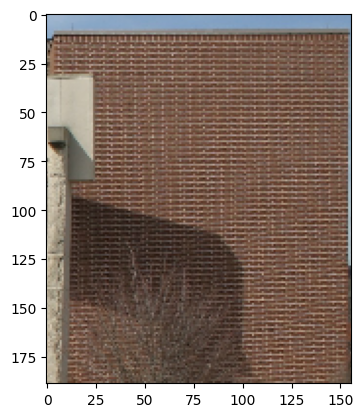

In [69]:
plt.imshow(bricks[::4,::4,:])

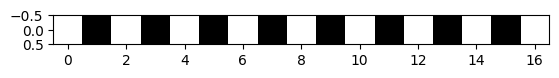

In [70]:
checker = np.zeros((1, 17))
checker[:, ::2] = 1.0
util.imshow_gray(checker)

##### Homework Problem 7

If you walked far away from the above image until you couldn't distinguish individual pixels, what would it look like?

If you naively subsample the above image, what would it look like?

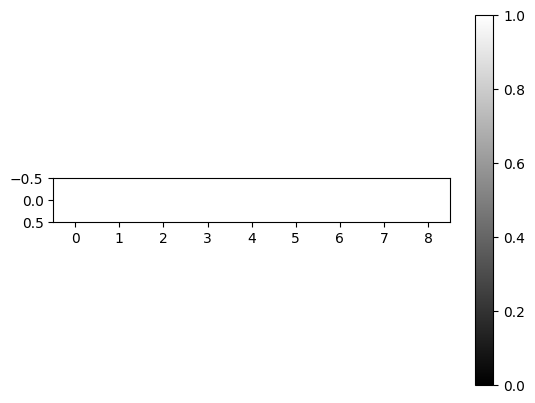

In [73]:
plt.imshow(checker[:, ::2], vmin=0, vmax=1, cmap="gray") # force color scale to [0,1] range
plt.colorbar()

**Whiteboard**: downsampling freqeuncyometer

In [ ]:
# todo: implement filtering.down_2x

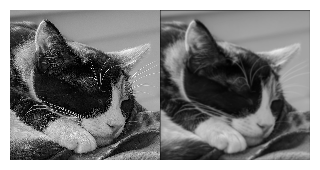

In [74]:
util.imshow_truesize(np.hstack([bg[::4,::4], filtering.down_4x(bg)]))

### Upsampling

My image is too small for my screen. For example, suppose beans is 150x150, but I want to display the image in 600x600 pixels. What should I do?

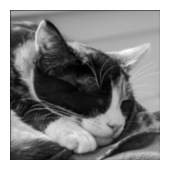

In [75]:
beans150 = filtering.down_4x(bg)
util.imshow_truesize(beans150)

See naive version preimplemented in `filtering.up_2x`

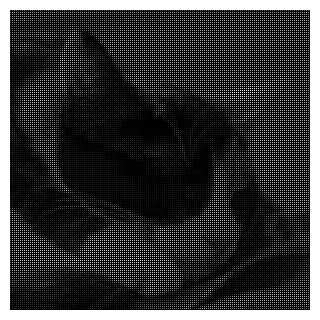

In [76]:
util.imshow_truesize(filtering.up_2x(beans150, interp="none"))

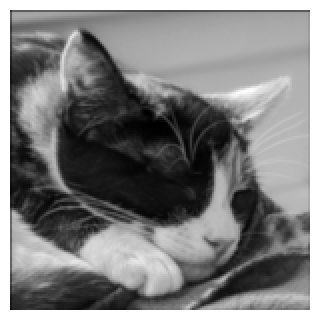

In [77]:
util.imshow_truesize(filtering.up_2x(beans150, interp="nn"))

**Whiteboard:** Filtering view of upsampling

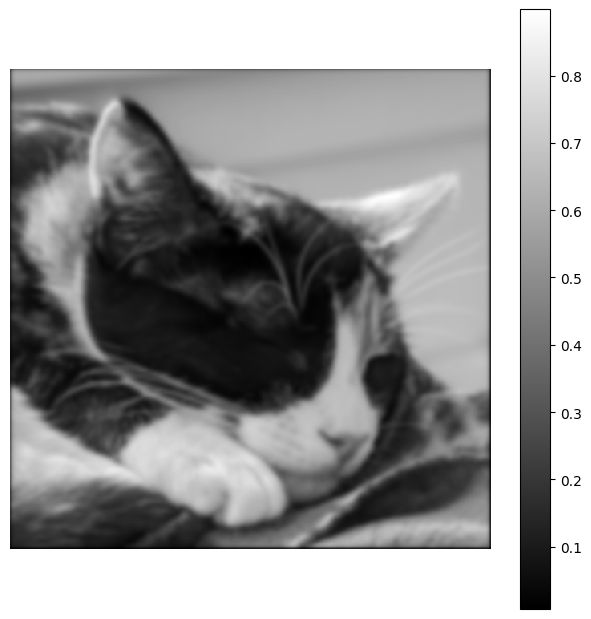

In [80]:
# todo: implement reconstruction filtering version in up_2x
# - Gaussian reconstruction filter
# - Linear reconstruction filter
util.imshow_truesize(filtering.up_4x(beans150, interp="gaussian"))
plt.colorbar()